In [25]:
using Random
using Distributions
using LinearAlgebra
using ForwardDiff
include("LowRankCov.jl")
include("../Inversion/Plot.jl")
include("../Inversion/P-GM-BBVI.jl")
include("../Derivative-Free-Variational-Inference/MultiModal.jl")
Random.seed!(111);

dt = 0.28671687531025064
dt = 0.5


[ Info: ("iter = ", 20, " / ", 200)


dt = 0.5
dt = 0.5


[ Info: ("iter = ", 40, " / ", 200)


dt = 0.5
dt = 0.5


[ Info: ("iter = ", 60, " / ", 200)


dt = 0.5
dt = 0.5


[ Info: ("iter = ", 80, " / ", 200)


dt = 0.4807185244744741
dt = 0.5

[ Info: ("iter = ", 100, " / ", 200)



dt = 0.5
dt = 0.5

[ Info: ("iter = ", 120, " / ", 200)



dt = 0.5
dt = 0.5


[ Info: ("iter = ", 140, " / ", 200)


dt = 0.5
dt = 0.5


[ Info: ("iter = ", 160, " / ", 200)


dt = 0.5
dt = 0.5


[ Info: ("iter = ", 180, " / ", 200)


dt = 0.5
dt = 0.5


[ Info: ("iter = ", 200, " / ", 200)


dt = 0.2483250974501903
dt = 0.2298085047177754


[ Info: ("iter = ", 20, " / ", 200)


dt = 0.2514547876773922
dt = 0.29605601221553635


[ Info: ("iter = ", 40, " / ", 200)


dt = 0.39042570806876126
dt = 0.3990263961651436


[ Info: ("iter = ", 60, " / ", 200)


dt = 0.5
dt = 0.5


[ Info: ("iter = ", 80, " / ", 200)


dt = 0.37410208204190676
dt = 0.5


[ Info: ("iter = ", 100, " / ", 200)


dt = 0.4239795905843887
dt = 0.41083479312522364

[ Info: ("iter = ", 120, " / ", 200)



dt = 0.42807626793415116
dt = 0.46087514818161696


[ Info: ("iter = ", 140, " / ", 200)


dt = 0.4477716858698145
dt = 0.4489851594355946


[ Info: ("iter = ", 160, " / ", 200)


dt = 0.45053692155304853
dt = 0.38185625246583177

[ Info: ("iter = ", 180, " / ", 200)



dt = 0.3565680522687268
dt = 0.3342155501065139


[ Info: ("iter = ", 200, " / ", 200)


dt = 0.24843258689331152
dt = 0.22504564205388586


[ Info: ("iter = ", 20, " / ", 200)


dt = 0.2319719943087269
dt = 0.29677914616212503


[ Info: ("iter = ", 40, " / ", 200)


dt = 0.5
dt = 0.5


[ Info: ("iter = ", 60, " / ", 200)


dt = 0.37989178498906195
dt = 0.5


[ Info: ("iter = ", 80, " / ", 200)


dt = 0.328424518611328
dt = 0.5


[ Info: ("iter = ", 100, " / ", 200)


dt = 0.5
dt = 0.5

[ Info: ("iter = ", 120, " / ", 200)



dt = 0.5
dt = 0.5


[ Info: ("iter = ", 140, " / ", 200)


dt = 0.5
dt = 0.5


[ Info: ("iter = ", 160, " / ", 200)


dt = 0.5
dt = 0.41135634129148546


[ Info: ("iter = ", 180, " / ", 200)


dt = 0.5
dt = 0.5


[ Info: ("iter = ", 200, " / ", 200)


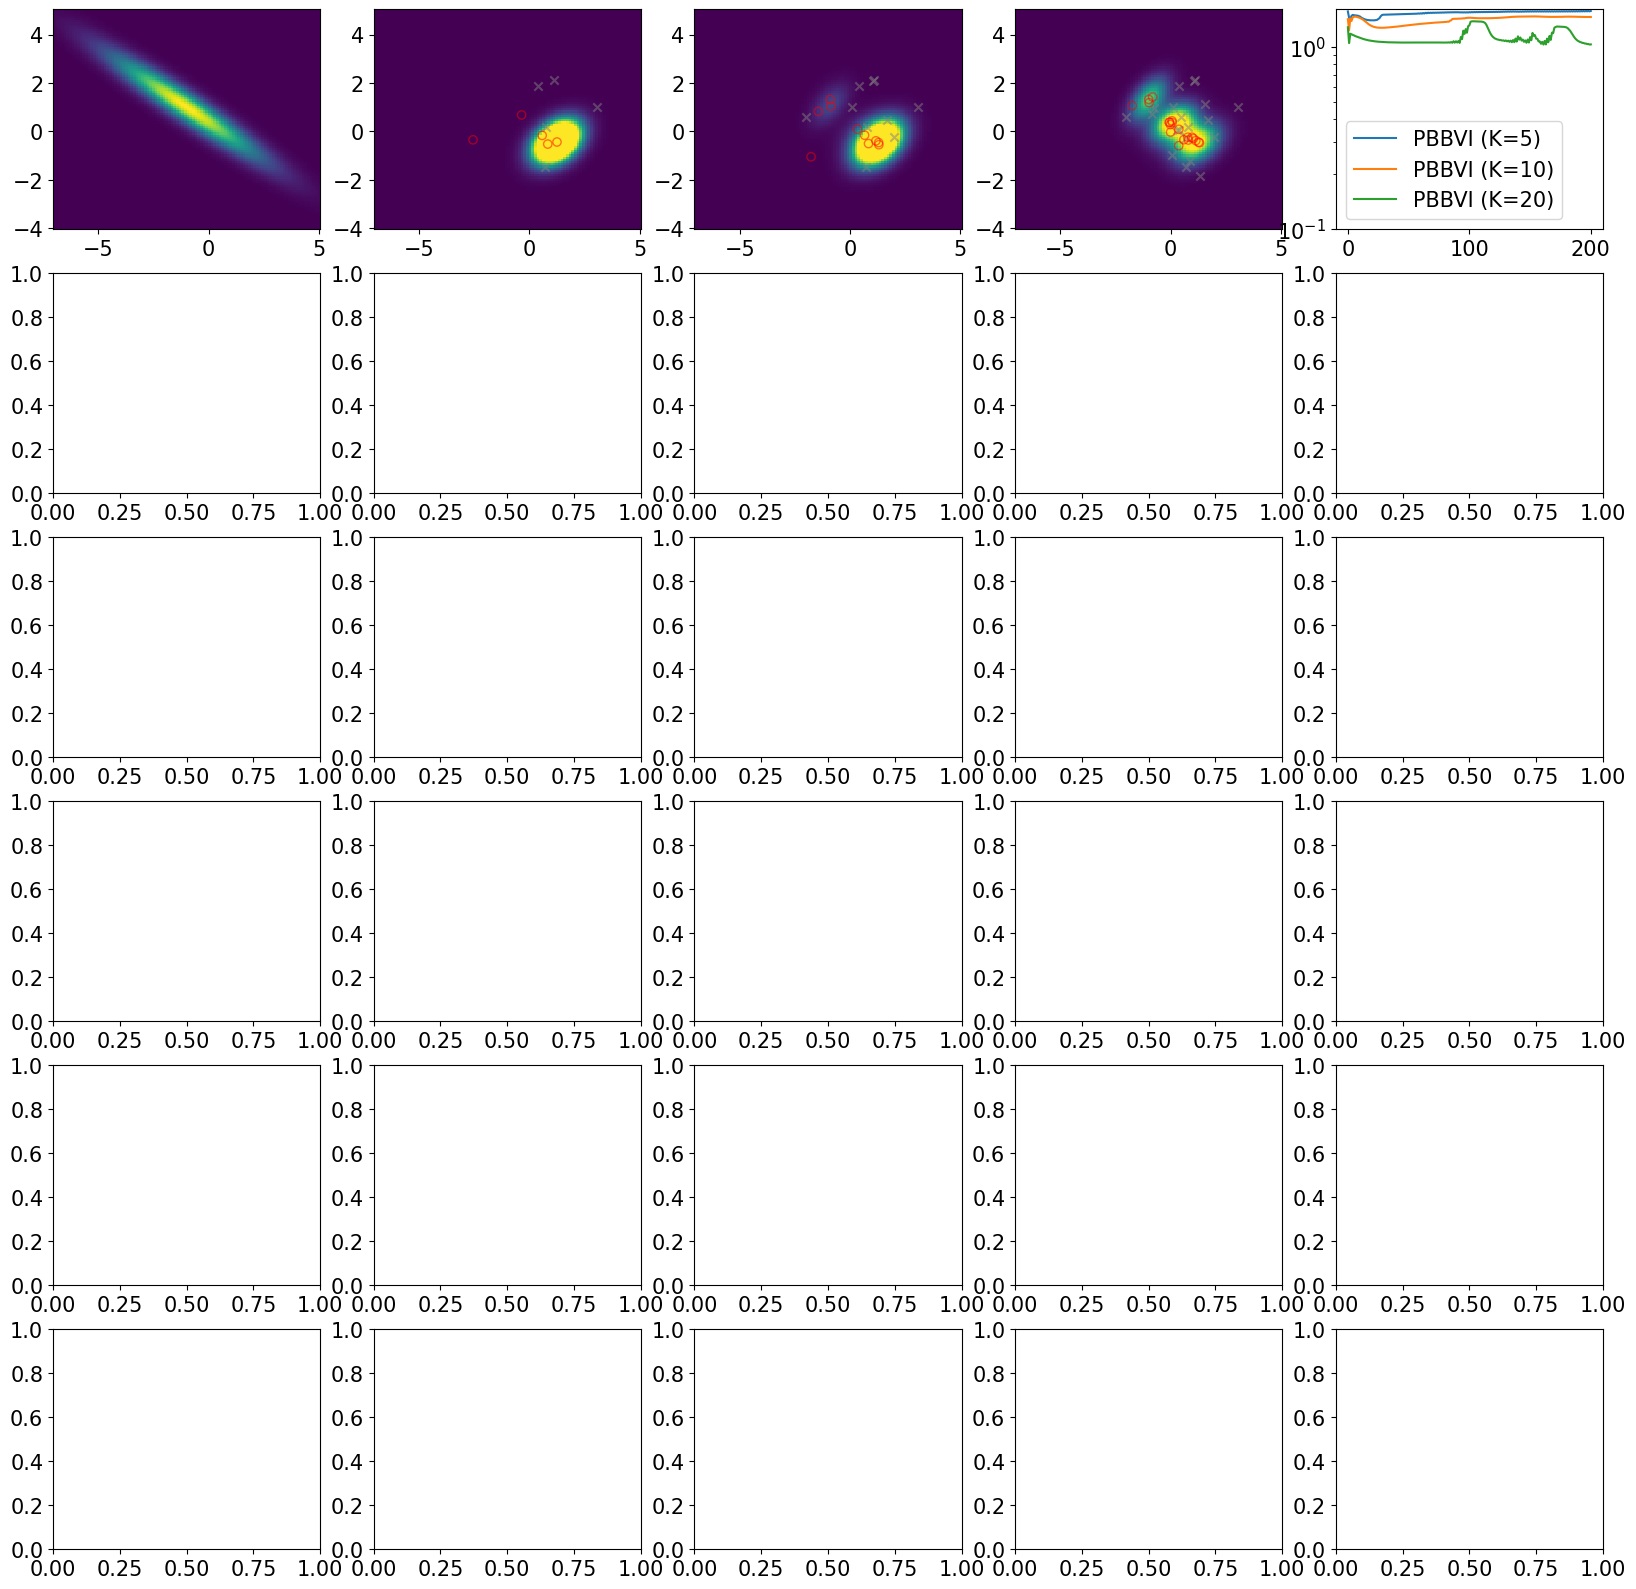

PyObject <matplotlib.legend.Legend object at 0x000002778211CD10>

In [27]:
N_modes_array = [5,10,20]    
fig, ax = PyPlot.subplots(nrows=6, ncols=length(N_modes_array)+2, sharex=false, sharey=false, figsize=(20,20))


N_modes = N_modes_array[end]
N_x = 20
N_r = 10
x0_w  = ones(N_modes)/N_modes

μ0, Σ0 = zeros(N_x), Diagonal(ones(N_x))
x0_mean, xx0_sqrt_cov = zeros(N_modes, N_x), zeros(N_modes, N_x, N_r)
for im = 1:N_modes
    x0_mean[im, :] .= rand(MvNormal(zeros(N_x), Σ0)) + μ0
    xx0_sqrt_cov[im, :, :] = rand(N_x,N_r)/sqrt(N_r)
end

N_iter = 200
Nx, Ny = 100,100

ση = 1.0
Gtype = "Gaussian"
dt = 0.5
A = [1.0 1.0; 1.0 2.0]
y = [0.0; 1.0; zeros(N_x-2)]
func_args = (y, ση, A , Gtype)
func_F(x) = F(x, func_args)
func_Phi(x) = 0.5*norm(func_F(x))^2
objs1 = [Gaussian_mixture_PBBVI(func_Phi, x0_w[1:N_modes], x0_mean[1:N_modes,:], xx0_sqrt_cov[1:N_modes,:,:]; N_iter = N_iter, dt = dt, N_r=N_r)
        for N_modes in N_modes_array]
y_2d = y[1:2]
func_args = (y_2d, ση, A , Gtype)
func_F(x) = F(x, func_args)
PGM_visualization_2d(ax[1,:]; Nx = Nx, Ny = Ny, x_lim=[-7.0, 5.0], y_lim=[-4.0, 5.0], func_Phi=func_Phi, objs=objs1, label="PBBVI")
# visualization_2d(ax[2,:]; Nx = Nx, Ny = Ny, x_lim=[-7.0, 5.0], y_lim=[-4.0, 5.0], func_F=func_F, objs=objs2, label="BBVI-SG")



# ση = 1.0
# dt = 0.1
# Gtype = "Four_modes"
# y = [4.2297; 4.2297; 0.5; 0.0; zeros(N_x-2)]
# func_args = (y, ση, 0, Gtype)
# func_F(x) = F(x, func_args)
# func_Phi(x) = norm(func_F(x),2)^2/2
# objs1 = [Gaussian_mixture_PBBVI(func_Phi, x0_w[1:N_modes], x0_mean[1:N_modes,:], xx0_sqrt_cov[1:N_modes,:,:]; N_iter = N_iter, dt = dt, N_r=N_r)
#         for N_modes in N_modes_array]
# y_2d = y[1:4]
# func_args = (y_2d, ση, A , Gtype)
# func_F(x) = F(x, func_args) 
# PGM_visualization_2d(ax[2,:]; Nx = Nx, Ny = Ny, x_lim=[-4.0, 4.0], y_lim=[-4.0, 4.0], func_F=func_F, objs=objs1, label="BBVI-GM")


# ση = [sqrt(10.0);sqrt(10.0); ones(N_x-2)]
# Gtype = "Banana"
# dt = 0.5
# λ = 10.0
# y = [0.0; 1.0; zeros(N_x-2)]
# func_args = (y, ση, λ , Gtype)
# func_F(x) = F(x, func_args)
# func_Phi(x) = norm(func_F(x),2)^2/2
# μ0, Σ0 = [0.0; 0.0], [1.0 0.0; 0.0 1.0]
# objs1 = [Gaussian_mixture_PBBVI(func_Phi, x0_w[1:N_modes], x0_mean[1:N_modes,:], xx0_sqrt_cov[1:N_modes,:,:]; N_iter = N_iter, dt = dt, N_r=N_r)
#         for N_modes in N_modes_array]
# # objs2 = [Gaussian_mixture_PBBVI(func_Phi, x0_w[1:N_modes], x0_mean[1:N_modes,:], xx0_sqrt_cov[1:N_modes,:,:]; N_iter = N_iter, dt = dt, N_ens=N_ens, random_quadrature_type="single_Gaussian")
# #         for N_modes in N_modes_array]
# y_2d, ση_2d = y[1:2], ση[1:2]
# func_args = (y_2d, ση_2d, λ , Gtype)
# func_F(x) = F(x, func_args)
# visualization_2d(ax[5,:]; Nx = Nx, Ny = Ny, x_lim=[-4.0, 4.0], y_lim=[-2.0, 10.0], func_F=func_F, objs=objs1, label="BBVI-GM")
# visualization_2d(ax[6,:]; Nx = Nx, Ny = Ny, x_lim=[-4.0, 4.0], y_lim=[-2.0, 10.0], func_F=func_F, objs=objs2, label="BBVI-SG")




# fig.tight_layout()
# fig.savefig("BBVI-GMD-Multimodal.pdf")
